In [127]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
graduates_data = pd.read_csv('/home/jkskw/git/ela_analysis/data/graduates-major-data.csv', sep=';')
students_data = pd.read_csv('/home/jkskw/git/ela_analysis/data/students-major-data.csv', sep=';')

# Define key variables for analysis
P_WOJ = graduates_data['P_WOJ']  # Województwo lokalizacji jednostki dydaktycznej
P_ME_ZAR = graduates_data['P_ME_ZAR']  # Mediana wynagrodzeń absolwentów
P_WWZ = graduates_data['P_WWZ']  # Względny Wskaźnik Zarobków
P_WWB = graduates_data['P_WWB']  # Względny Wskaźnik Bezrobocia
P_WWB_DOSW = graduates_data['P_WWB_DOSW']  # Wskaźnik Bezrobocia dla absolwentów z doświadczeniem
P_WWB_NDOSW = graduates_data['P_WWB_NDOSW']  # Wskaźnik Bezrobocia dla absolwentów bez doświadczenia
P_CZAS_PRACA_DOSW = graduates_data['P_CZAS_PRACA_DOSW']  # Czas do pierwszej pracy dla absolwentów z doświadczeniem
P_CZAS_PRACA_NDOSW = graduates_data['P_CZAS_PRACA_NDOSW']  # Czas do pierwszej pracy dla absolwentów bez doświadczenia
P_ME_ZAR_DOSW = graduates_data['P_ME_ZAR_DOSW']  # Mediana wynagrodzeń dla absolwentów z doświadczeniem
P_ME_ZAR_NDOSW = graduates_data['P_ME_ZAR_NDOSW']  # Mediana wynagrodzeń dla absolwentów bez doświadczenia
P_N = students_data['P_N']  # Liczba studentów
P_ABS = graduates_data['P_N'] # Liczba absolwentów
P_POZIOM = graduates_data['P_POZIOM']  # Poziom studiów
P_FORMA = graduates_data['P_FORMA']  # Forma studiów
P_ROKDYP = graduates_data['P_ROKDYP'] # Rok ukończenia studiów
P_ROK_OD = students_data['P_ROK_OD'] # Rok rozpoczęcia studiów
P_KIERUNEK_NAZWA = graduates_data['P_KIERUNEK_NAZWA'] # Pełna nazwa kierunku
P_ME_ZAR_P1 = graduates_data['P_ME_ZAR_P1'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 1 roku po uzyskaniu dyplomu
P_ME_ZAR_P2 = graduates_data['P_ME_ZAR_P2'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 2 roku po uzyskaniu dyplomu
P_ME_ZAR_P3 = graduates_data['P_ME_ZAR_P3'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 3 roku po uzyskaniu dyplomu
P_ME_ZAR_P4 = graduates_data['P_ME_ZAR_P4'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 4 roku po uzyskaniu dyplomu
P_ME_ZAR_P5 = graduates_data['P_ME_ZAR_P5'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 5 roku po uzyskaniu dyplomu
P_N_SEMESTR = graduates_data['P_N_SEMESTR'] # Liczba semestrów
P_NAZWA_UCZELNI = graduates_data['P_NAZWA_UCZELNI'] # Nazwa uczelni

/tmp/ipykernel_13136/3412106287.py:7: DtypeWarning: Columns (13,14,15,16,17,18,19,57,59,61,63,65,67,81,83,85,87,89,91,105,106,108,109,111,112,114,115,117,118,120,121,135,136,138,139,141,142,144,145,147,148,150,151,165,166,168,169,171,172,174,175,177,178,180,181,195,196,198,199,201,202,204,205,207,208,210,211,225,226,229,230,232,233,235,236,238,239,241,242,256,257,259,260,262,263,265,266,268,269,271,272,288,299,300,301,303,304,306,307,309,310,312,313,315,316,330,331,337,338,340,341,343,344,346,347,349,350,364,365,367,368,370,371,373,374,376,377,379,380,394,395,403,404,406,407,409,410,412,413,415,416,430,431,433,434,436,437,439,440,442,443,445,446) have mixed types. Specify dtype option on import or set low_memory=False.
  graduates_data = pd.read_csv('/home/jkskw/git/ela_analysis/data/graduates-major-data.csv', sep=';')
/tmp/ipykernel_13136/3412106287.py:8: DtypeWarning: Columns (9,18,23,30,64,71,78,85,92,99,106,113,120) have mixed types. Specify dtype option on import or set low_memory

In [ ]:
desired_year = 2018
field_of_study = 'informat'
form = 'N'
level = '2'

P_WWZ_MIES = {}
P_WWB_MIES = {}

temp_data = graduates_data[['P_ROKDYP', 'P_KIERUNEK_NAZWA', 'P_FORMA', 'P_POZIOM', 'P_N']].copy()

for i in range(1, 61):
    temp_data[f'P_WWZ_MIES_{i}'] = graduates_data[f'P_WWZ_MIES_{i}'].str.replace(',', '.').astype(float)
    temp_data[f'P_WWB_MIES_{i}'] = graduates_data[f'P_WWB_MIES_{i}'].str.replace(',', '.').astype(float)
    

temp_data = temp_data[temp_data['P_ROKDYP'] == desired_year]
temp_data = temp_data[temp_data['P_FORMA'] == form]
temp_data = temp_data[temp_data['P_POZIOM'] == level]
temp_data = temp_data[temp_data['P_KIERUNEK_NAZWA'].str.contains(field_of_study, case=False, na=False)]

for i in range(1, 61):
    temp_data = temp_data.dropna(subset=[f'P_WWZ_MIES_{i}', f'P_WWB_MIES_{i}'])
    P_WWZ_MIES[i] = temp_data[f'P_WWZ_MIES_{i}']
    P_WWB_MIES[i] = temp_data[f'P_WWB_MIES_{i}']

temp_data.describe

/tmp/ipykernel_13136/1315816548.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp_data[f'P_WWZ_MIES_{i}'] = graduates_data[f'P_WWZ_MIES_{i}'].str.replace(',', '.').astype(float)
/tmp/ipykernel_13136/1315816548.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp_data[f'P_WWB_MIES_{i}'] = graduates_data[f'P_WWB_MIES_{i}'].str.replace(',', '.').astype(float)
/tmp/ipykernel_13136/1315816548.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which

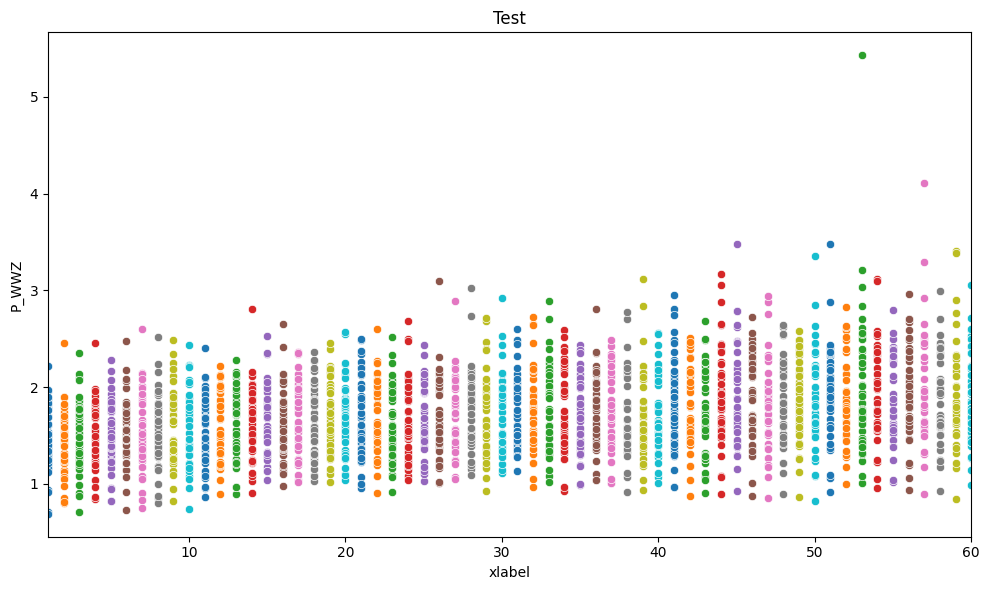

In [129]:
num_bins = 50
x_range = (1, 60)

plt.figure(figsize=(10, 6))
for i in range(1, 61):
    # sns.histplot(
    #     data=temp_data, 
    #     x=f'P_WWZ_MIES_{i}', 
    #     weights='P_N', 
    #     bins=num_bins, 
    #     binrange=x_range, 
    #     kde=False, 
    #     color='blue',
    #     edgecolor="black", 
    #     alpha=0.6, 
    #     stat="count"
    # )
    # sns.lineplot(data=temp_data, x=i, y=f'P_WWZ_MIES_{i}')
    sns.scatterplot(data=temp_data, x=i, y=f'P_WWZ_MIES_{i}')

plt.title('Test')
plt.xlabel('xlabel')
plt.ylabel('P_WWZ')
plt.xlim(x_range)
plt.tight_layout()
plt.show()

In [130]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_predictions(model, X_train, y_train, X_test, y_test, months=78, method_name="Regression"):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions for test data
    y_pred = model.predict(X_test)
    
    # Prepare data for predictions beyond month 60
    future_predictions = []
    current_lags = X.iloc[-1].values.reshape(1, -1)  # Start with the last known lag features
    for month in range(61, months + 1):
        next_prediction = model.predict(current_lags)
        future_predictions.append(next_prediction[0])
        # Update lags with the predicted value
        current_lags = np.roll(current_lags, -1)  # Shift values to the left
        current_lags[0, -1] = next_prediction  # Insert the new prediction
    
    # Combine actual and predicted data for visualization
    all_months = list(range(1, months + 1))
    actual_data = y_train.tolist() + y_test.tolist()
    predicted_data = [None] * 60 + future_predictions  # None for months 1-60
    
    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(all_months[:60], actual_data[:60], label="Actual (Months 1-60)", marker='o')
    plt.plot(all_months[60:], predicted_data[60:], label="Predicted (Months 61-120)", marker='x', linestyle='--')
    plt.axvline(x=60, color='gray', linestyle=':', label="Start of Predictions")
    plt.title(f"{method_name} - Actual vs Predicted Salaries")
    plt.xlabel("Months")
    plt.ylabel("Salary")
    plt.legend()
    plt.grid()
    plt.show()

In [131]:
# Combine P_WWZ_MIES and P_WWB_MIES into a single DataFrame
P_WWZ_MIES_df = pd.DataFrame(P_WWZ_MIES)
P_WWB_MIES_df = pd.DataFrame(P_WWB_MIES)

# Add prefixes to distinguish columns
P_WWZ_MIES_df = P_WWZ_MIES_df.add_prefix('WWZ_')
P_WWB_MIES_df = P_WWB_MIES_df.add_prefix('WWB_')

# Combine both DataFrames
data = pd.concat([P_WWZ_MIES_df, P_WWB_MIES_df], axis=1)

# Verify the combined data
print(data.head())

      WWZ_1  WWZ_2  WWZ_3  WWZ_4  WWZ_5  WWZ_6  WWZ_7  WWZ_8  WWZ_9  WWZ_10  \
123    1.37   1.45   1.22   1.43   1.61   1.63   1.44   1.40   1.37    1.38   
2139   1.19   1.14   1.22   1.15   1.25   1.14   1.29   1.37   1.28    1.31   
2990   1.23   1.28   1.29   1.25   1.29   1.29   1.33   1.34   1.41    1.32   
3099   1.88   1.43   1.16   1.79   1.39   1.48   1.53   1.60   1.38    1.69   
4171   1.45   1.54   1.33   1.47   1.33   1.34   1.39   1.49   1.35    1.41   

      ...  WWB_51  WWB_52  WWB_53  WWB_54  WWB_55  WWB_56  WWB_57  WWB_58  \
123   ...    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
2139  ...    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
2990  ...    0.39    0.38    0.36    0.36    0.37    0.38    0.38    0.38   
3099  ...    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
4171  ...    2.60    2.60    2.78    2.78    2.78    2.98    2.60    0.00   

      WWB_59  WWB_60  
123     0.00    0.00  
2139    0.00    

In [132]:
# Create lag features for supervised learning
def create_lag_features(data, target_column, n_lags=12):
    lagged_data = pd.DataFrame(data[target_column])
    for lag in range(1, n_lags + 1):
        lagged_data[f'lag_{lag}'] = data[target_column].shift(lag)
    lagged_data = lagged_data.dropna()  # Drop rows with NaN due to shifting
    return lagged_data

# Target column for the last month (month 60)
target_column = 'WWZ_60'

# Generate lag features
data_with_lags = create_lag_features(P_WWZ_MIES_df, target_column, n_lags=12)
print(data_with_lags.head())

       WWZ_60  lag_1  lag_2  lag_3  lag_4  lag_5  lag_6  lag_7  lag_8  lag_9  \
12026    2.53   2.71   1.27   0.99   1.73   1.65   1.47   2.59   2.06   2.19   
12076    1.93   2.53   2.71   1.27   0.99   1.73   1.65   1.47   2.59   2.06   
14888    1.28   1.93   2.53   2.71   1.27   0.99   1.73   1.65   1.47   2.59   
15983    2.22   1.28   1.93   2.53   2.71   1.27   0.99   1.73   1.65   1.47   
16045    1.48   2.22   1.28   1.93   2.53   2.71   1.27   0.99   1.73   1.65   

       lag_10  lag_11  lag_12  
12026    2.06    1.67    1.86  
12076    2.19    2.06    1.67  
14888    2.06    2.19    2.06  
15983    2.59    2.06    2.19  
16045    1.47    2.59    2.06  


In [133]:
from sklearn.model_selection import train_test_split

# Features (lagged data) and target (current salary)
X = data_with_lags.drop(target_column, axis=1)
y = data_with_lags[target_column]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(25, 12) (7, 12) (25,) (7,)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 25, number of used features: 0
[LightGBM] [Info] Start training from score 1.938000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

/tmp/ipykernel_13136/1651486506.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_lags[0, -1] = next_prediction  # Insert the new prediction
/tmp/ipykernel_13136/1651486506.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_lags[0, -1] = next_prediction  # Insert the new prediction
/tmp/ipykernel_13136/1651486506.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_lags[0, -1] = next_prediction  # Insert the new prediction
/tmp/ipykerne

ValueError: x and y must have same first dimension, but have shapes (60,) and (32,)

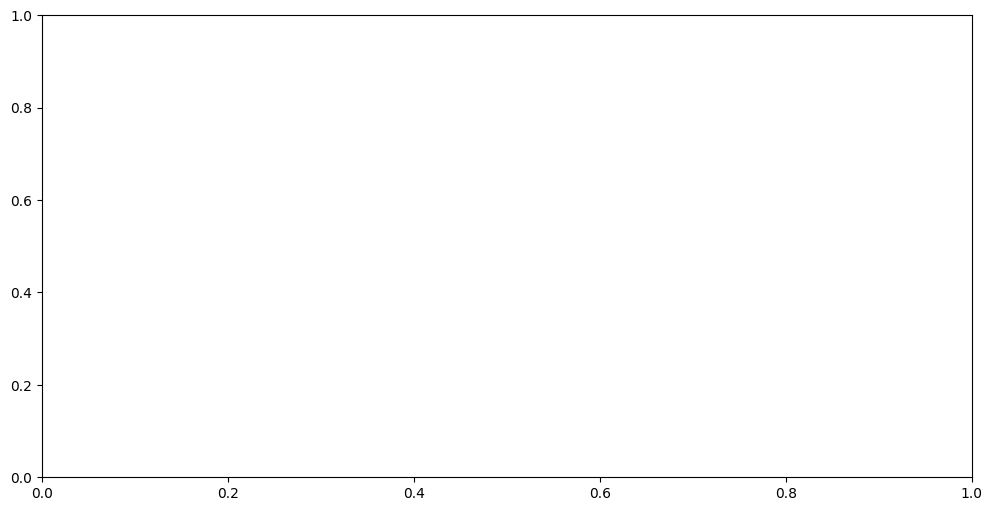

In [134]:
from lightgbm import LGBMRegressor
from sklearn.metrics import root_mean_squared_error

# Train a LightGBM model
model_lgbm = LGBMRegressor(random_state=42)
model_lgbm.fit(X_train, y_train)

# Make predictions
y_pred_lgbm = model_lgbm.predict(X_test)

# Evaluate the model
print("LightGBM RMSE:", root_mean_squared_error(y_test, y_pred_lgbm))

# LightGBM Regression
visualize_predictions(model_lgbm, X_train, y_train, X_test, y_test, method_name="LightGBM Regression")

Linear Regression RMSE: 0.6070134219774789


/home/jkskw/git/ela_analysis/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/jkskw/git/ela_analysis/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/tmp/ipykernel_13136/1651486506.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_lags[0, -1] = next_prediction  # Insert the new prediction
/home/jkskw/git/ela_analysis/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
 

ValueError: x and y must have same first dimension, but have shapes (60,) and (20,)

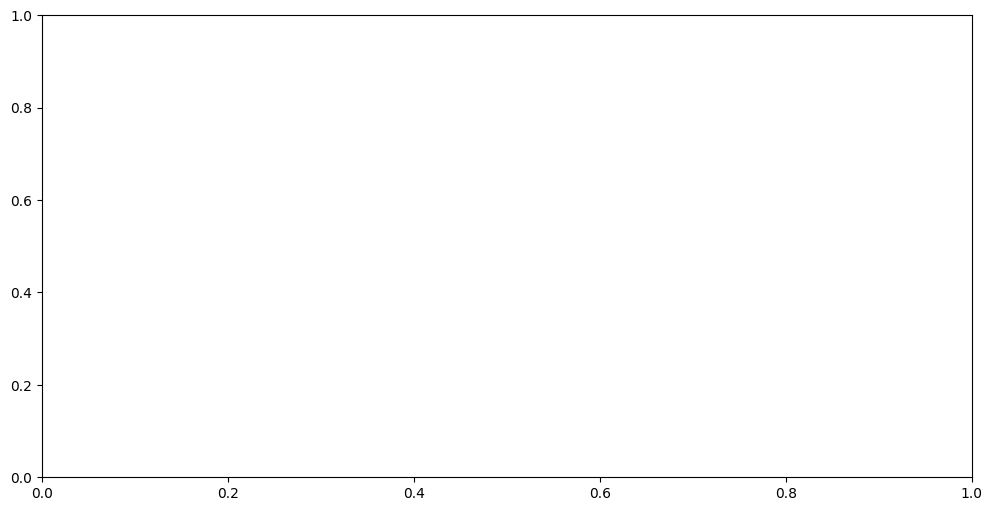

In [ ]:
from sklearn.linear_model import LinearRegression

# Train a Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model
print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))

# Linear Regression
visualize_predictions(model_lr, X_train, y_train, X_test, y_test, method_name="Linear Regression")


/home/jkskw/git/ela_analysis/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/jkskw/git/ela_analysis/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/tmp/ipykernel_13136/1651486506.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_lags[0, -1] = next_prediction  # Insert the new prediction
/home/jkskw/git/ela_analysis/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with featu

Random Forest RMSE: 0.33542837486811805


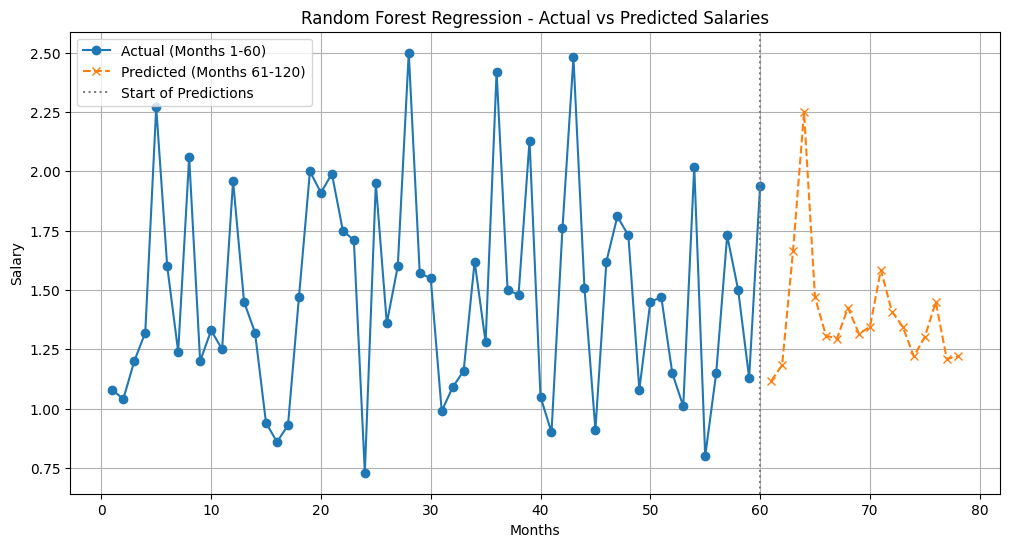

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))

# Random Forest Regression
visualize_predictions(model_rf, X_train, y_train, X_test, y_test, method_name="Random Forest Regression")

SVR RMSE: 0.33536343385729034


/home/jkskw/git/ela_analysis/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/jkskw/git/ela_analysis/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/tmp/ipykernel_13136/1651486506.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_lags[0, -1] = next_prediction  # Insert the new prediction
/home/jkskw/git/ela_analysis/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/tmp/ipyke

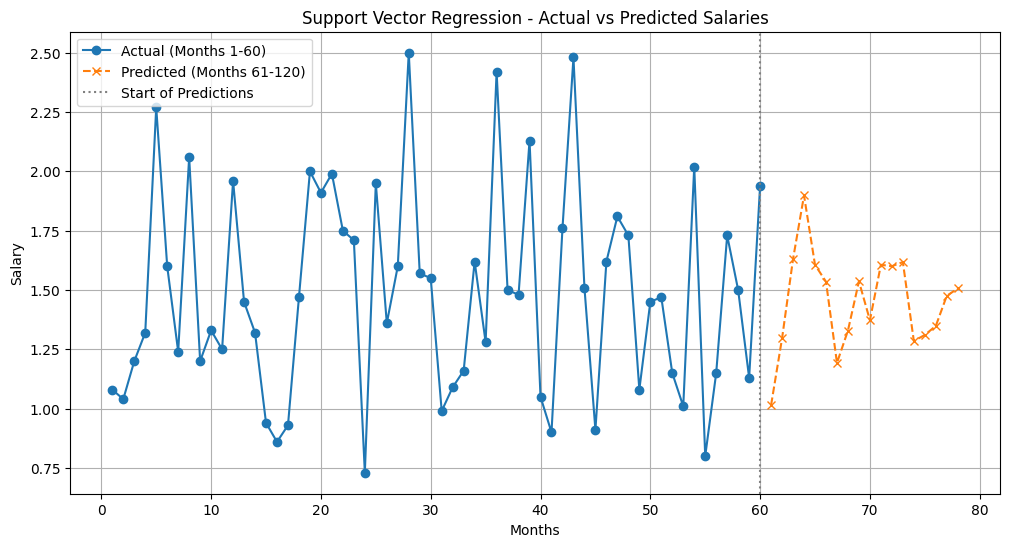

In [ ]:
from sklearn.svm import SVR

# Train an SVR model
model_svr = SVR(kernel='rbf')
model_svr.fit(X_train, y_train)

# Make predictions
y_pred_svr = model_svr.predict(X_test)

# Evaluate the model
print("SVR RMSE:", mean_squared_error(y_test, y_pred_svr, squared=False))

# Support Vector Regression
visualize_predictions(model_svr, X_train, y_train, X_test, y_test, method_name="Support Vector Regression")